In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [42]:
df_dataScience = pd.read_csv('Topic_Survey_Assignment.csv')

In [43]:
df_dataScience.head(3)

,Unnamed: 0,Very interested,Somewhat interested,Not interested
0,Big Data (Spark / Hadoop),1332,729,127
1,Data Analysis / Statistics,1688,444,60
2,Data Journalism,429,1081,610


<h2><u>Problem 1</u></h2>

In [44]:
df_dataScience.rename(columns={'Unnamed: 0':'Topic'}, inplace=True )
df_dataScience.set_index('Topic', inplace = True)

#Sort the dataframe in descending order of Very interested
df_dataScience.sort_values(['Very interested'], ascending = False, axis = 0, inplace = True)

#converting the dataframe into percentages 
df_dataScience = df_dataScience.divide(2233)
df_dataScience = df_dataScience.multiply(100)
df_dataScience = df_dataScience.round(2)
df_dataScience.head()

,Very interested,Somewhat interested,Not interested
Topic,,,
Data Analysis / Statistics,75.59,19.88,2.69
Machine Learning,72.95,21.36,3.31
Data Visualization,60.01,32.87,4.57
Big Data (Spark / Hadoop),59.65,32.65,5.69
Deep Learning,56.56,34.48,6.09


<h2><u>Problem 2</u></h2>

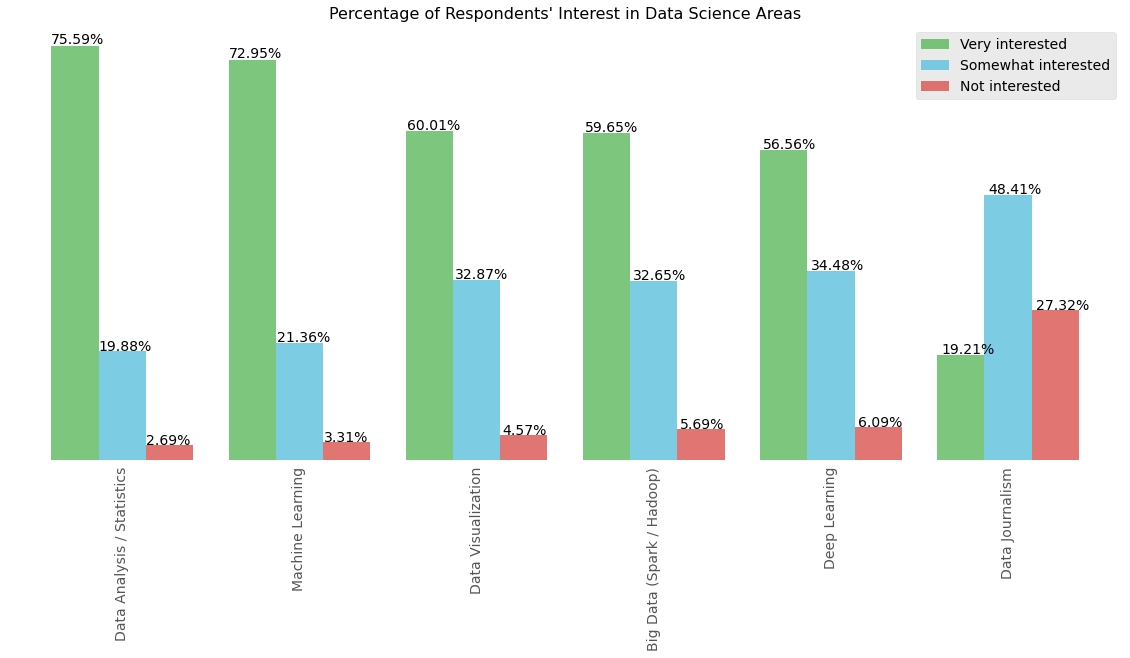

In [45]:

%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('ggplot')

color_list = ['#5cb85c', '#5bc0de', '#d9534f']

ax = df_dataScience.plot.bar(figsize = (20, 8), alpha = 0.8, width = 0.8, color = color_list)
ax.set_title("Percentage of Respondents' Interest in Data Science Areas", fontsize = 16)

legend = ax.legend(fontsize='14')
ax.tick_params(axis='x', labelsize=14)
ax.set_xlabel('')

#Putting the percentage values on top of each bar
for p in ax.patches:
    ax.annotate(str(p.get_height()) + '%', (p.get_x() * 1.005, p.get_height() * 1.005), fontsize = 14)
    
ax.set_facecolor('xkcd:white')
plt.tick_params(top=False, bottom=False, left=False, right=False, labelleft=False, labelbottom=True)

<h2><u>Problem 3</u></h2>

In [56]:
a = df.PdDistrict.value_counts()
result = pd.DataFrame(data=a.values, index=a.index, columns=['Count'])
result = result.reindex(["CENTRAL", "NORTHERN", "PARK", "SOUTHERN", "MISSION", "TENDERLOIN", "RICHMOND", "TARAVAL", "INGLESIDE", "BAYVIEW"])
result = result.reset_index()
result.rename({'index': 'Neighborhood'}, axis='columns', inplace=True)
result

,Neighborhood,Count
0,CENTRAL,17666
1,NORTHERN,20100
2,PARK,8699
3,SOUTHERN,28445
4,MISSION,19503
5,TENDERLOIN,9942
6,RICHMOND,8922
7,TARAVAL,11325
8,INGLESIDE,11594
9,BAYVIEW,14303


In [57]:
#Choropleth map
!pip install folium
import folium

In [58]:
latitude = 37.77
longitude = -122.42


SF_geo = r'san-francisco.geojson'

In [59]:
sanfran_map = folium.Map(location = [latitude, longitude], zoom_start = 12)

# generate choropleth map using the total immigration of each country to Canada from 1980 to 2013
sanfran_map.choropleth(
    geo_data=SF_geo,
    data=result,
    columns=['Neighborhood', 'Count'],
    key_on='feature.properties.DISTRICT',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Crime Rate in San Francisco'
)

# display map
sanfran_map

e:\falansh\applications\new folder\lib\site-packages\folium\folium.py:411: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(
